# Kernel 6.6 vs 6.5 Benchmarks

Benchmarks using Phoronix Test Suite to compare kernel 6.6 vs 6.5, with the focus on trying to see difference in EEVDF and CFS schedulers.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
df = pd.read_csv('results.csv')

In [115]:
df

,Benchmark Type,Kernel 6.5 (CFS),Kernel 6.6 (EEVDF),Units
0,Hackbench 8 Thread (Lower is Better),43.72,33.53,sec
1,Hackbench 16 Thread (Lower is Better),77.27,66.79,sec
2,Hackbench 8 Process (Lower is Better),32.90,33.07,sec
3,Hackbench 16 Process (Lower is Better),74.58,65.47,sec
4,Nginx 500 Connections (Higher is Better),30064.00,35855.00,reqs/sec
5,Nginx 1000 Connections (Higher is Better),27980.00,31479.00,reqs/sec
6,7-Zip Compression (Higher is Better),56833.00,56906.00,MIPS
7,7-Zip Decompression (Higher is Better),58726.00,59149.00,MIPS
8,Ffmpeg libx264 Video On Demand (Higher is Better),44.42,44.56,FPS
9,Ffmpeg libx265 Video On Demand (Higher is Better),36.38,36.37,FPS


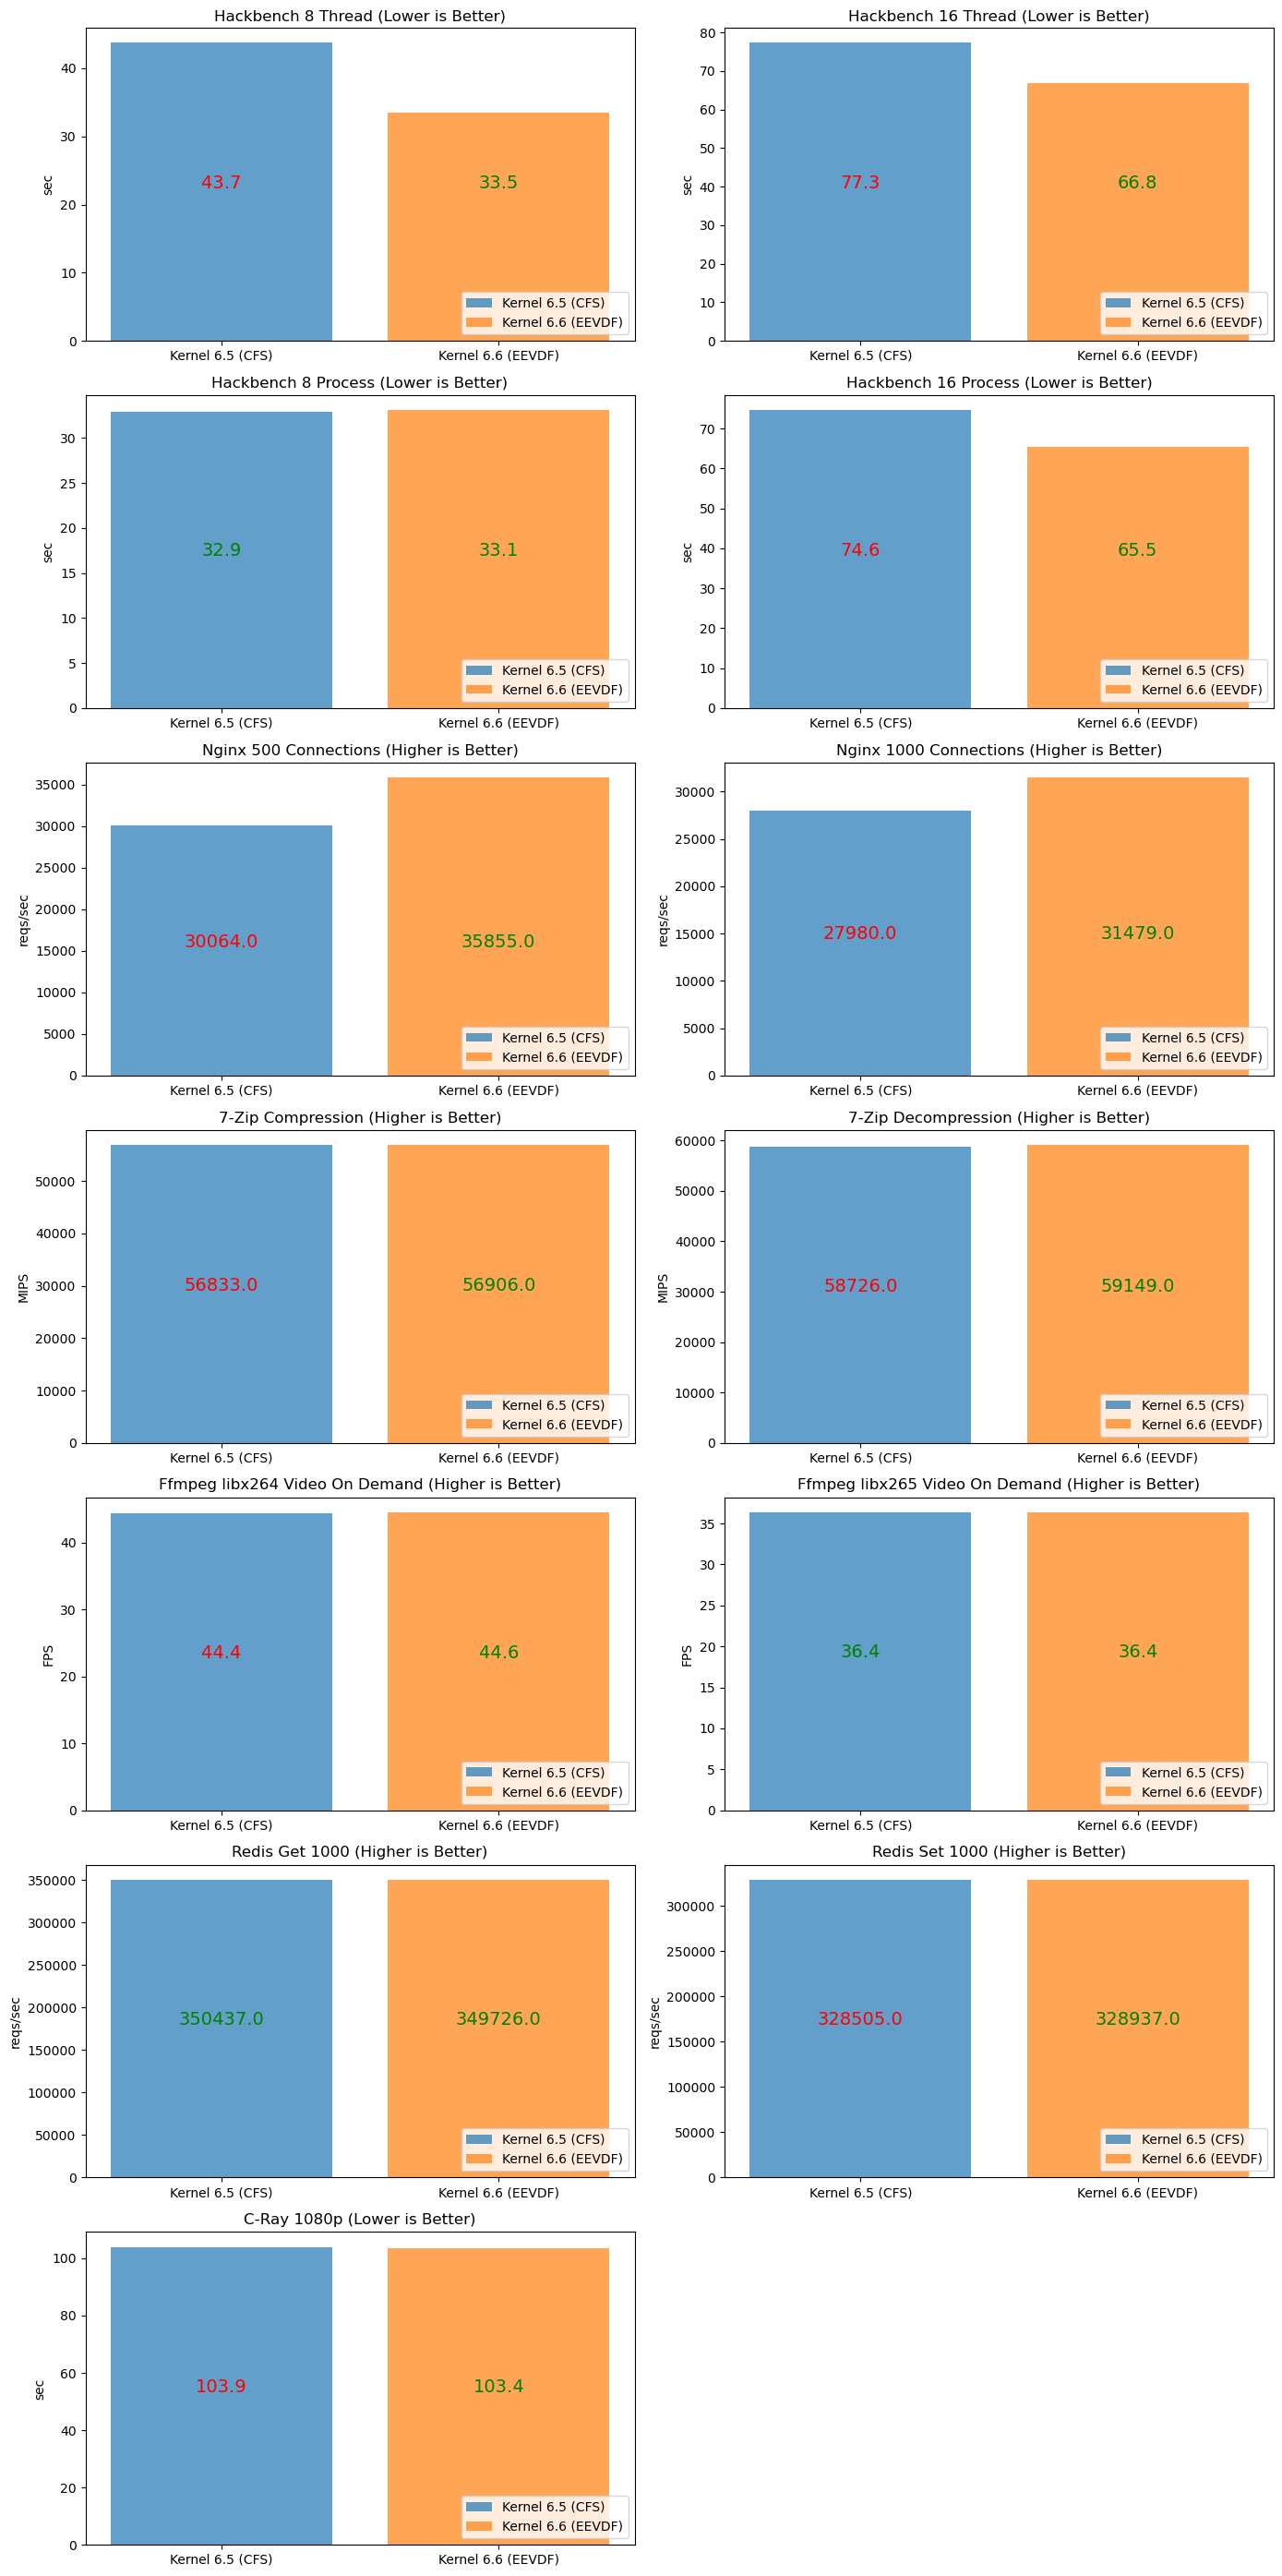

In [153]:
num_benchmarks = len(df)

# Set up the figure for multiple subplots (2 plots per row)

n_rows = (num_benchmarks + 1) // 2  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))

# Plot each benchmark separately
for i, ax in enumerate(axes.flatten()):  # Flatten to easily iterate
    if i < num_benchmarks:
        indice = i
        benchmark = df['Benchmark Type'][indice]
        cfs_result = df['Kernel 6.5 (CFS)'][indice]
        eevdf_result = df['Kernel 6.6 (EEVDF)'][indice]

        # Bar positions
        bar_width = 0.8
        x = [0, 1]  # Positions for bars

        # Plot the bars
        bars_cfs = ax.bar(x[0], cfs_result, width=bar_width, label='Kernel 6.5 (CFS)', alpha=0.7)
        bars_eevdf = ax.bar(x[1], eevdf_result, width=bar_width, label='Kernel 6.6 (EEVDF)', alpha=0.7)
        
        # green text for better result
        cfs_better = False
        eevdf_better = True
        if "Lower" in benchmark and cfs_result < eevdf_result:
            cfs_better = True
        elif "Higher" in benchmark and cfs_result > eevdf_result:
            cfs_better = True
        

        # Add numerical labels to each bar
        font_size = 14
        text_vertical_offset = cfs_result*0.5
        ax.text(x[0], text_vertical_offset, f"{cfs_result:.1f}", ha='center', va='bottom', color='green' if cfs_better else 'red', fontsize=font_size)
        ax.text(x[1], text_vertical_offset, f"{eevdf_result:.1f}", ha='center', va='bottom', color='green' if eevdf_better else 'red', fontsize=font_size)

        # Add labels and title to each subplot
        ax.set_ylabel(df['Units'][indice])
        ax.set_title(benchmark)
        ax.set_xticks(x)
        ax.set_xticklabels(['Kernel 6.5 (CFS)', 'Kernel 6.6 (EEVDF)'])
        ax.legend(loc='lower right')
    else:
        ax.axis('off')  # Turn off unused subplots

# Step 4: Adjust layout
plt.tight_layout()
plt.show()

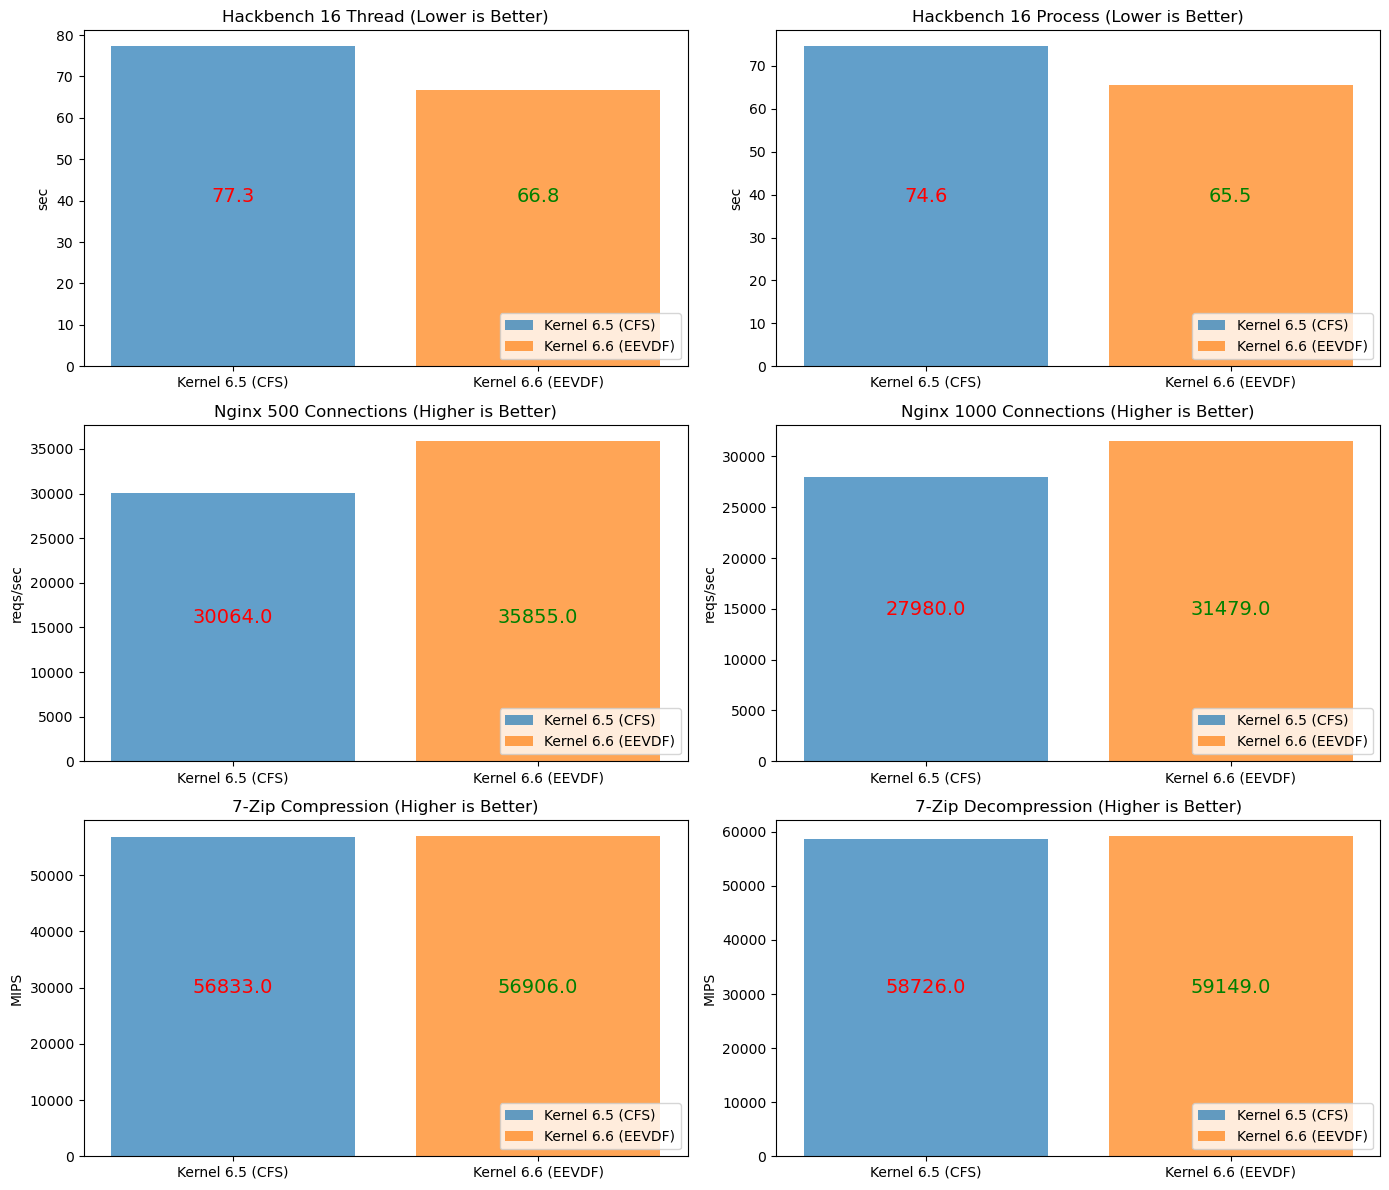

In [154]:
num_benchmarks = len(df)

# plots to exclude for paper
exclude_indices = [0,2,8,9,10,11,12]
include_indices = [i for i in range(num_benchmarks) if i not in exclude_indices]

# Set up the figure for multiple subplots (2 plots per row)

# n_rows = (num_benchmarks + 1) // 2  # Calculate number of rows needed
n_rows = (num_benchmarks + 1 - len(exclude_indices)) // 2  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))

# Plot each benchmark separately
for i, ax in enumerate(axes.flatten()):  # Flatten to easily iterate
    # if i < num_benchmarks:
    if i < num_benchmarks and i<len(include_indices):  # Only plot for the number of benchmarks available
        indice = include_indices[i]
        benchmark = df['Benchmark Type'][indice]
        cfs_result = df['Kernel 6.5 (CFS)'][indice]
        eevdf_result = df['Kernel 6.6 (EEVDF)'][indice]

        # Bar positions
        bar_width = 0.8
        x = [0, 1]  # Positions for bars

        # Plot the bars
        bars_cfs = ax.bar(x[0], cfs_result, width=bar_width, label='Kernel 6.5 (CFS)', alpha=0.7)
        bars_eevdf = ax.bar(x[1], eevdf_result, width=bar_width, label='Kernel 6.6 (EEVDF)', alpha=0.7)
        
        # green text for better result
        cfs_better = False
        eevdf_better = True
        if "Lower" in benchmark and cfs_result < eevdf_result:
            cfs_better = True
        elif "Higher" in benchmark and cfs_result > eevdf_result:
            cfs_better = True
        

        # Add numerical labels to each bar
        font_size = 14
        text_vertical_offset = cfs_result*0.5
        ax.text(x[0], text_vertical_offset, f"{cfs_result:.1f}", ha='center', va='bottom', color='green' if cfs_better else 'red', fontsize=font_size)
        ax.text(x[1], text_vertical_offset, f"{eevdf_result:.1f}", ha='center', va='bottom', color='green' if eevdf_better else 'red', fontsize=font_size)

        # Add labels and title to each subplot
        ax.set_ylabel(df['Units'][indice])
        ax.set_title(benchmark)
        ax.set_xticks(x)
        ax.set_xticklabels(['Kernel 6.5 (CFS)', 'Kernel 6.6 (EEVDF)'])
        ax.legend(loc='lower right')
    else:
        ax.axis('off')  # Turn off unused subplots

# Step 4: Adjust layout
plt.tight_layout()
plt.show()